**DESCRIPTION**

The project will deal with single family  homes in Miami USA and create a predictive scikit-learn model. The model will feature a number of features that will show contribution to the price of the property. Use the link to see the dataset feature description

> Indented block


https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
# wrangle function for data loading and wrangling
def wrangle (path):
  df = pd.read_csv(path)
  df.drop(columns=['SUBCNTR_DI','HWY_DIST','PARCELNO','RAIL_DIST','avno60plus',
                   'month_sold','structure_quality','age'], inplace =True)
  #dropping multicolinearity features
  df.drop(columns = "LND_SQFOOT", inplace= True)
  return df

In [3]:
#loading the dataset
df = wrangle("/content/drive/MyDrive/Data science journey/miami-housing.csv") # replace with your path

In [4]:
# checking the content of df and info()
print(df.info()) # to check missing values in the dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LATITUDE       13932 non-null  float64
 1   LONGITUDE      13932 non-null  float64
 2   SALE_PRC       13932 non-null  float64
 3   TOT_LVG_AREA   13932 non-null  int64  
 4   SPEC_FEAT_VAL  13932 non-null  int64  
 5   OCEAN_DIST     13932 non-null  float64
 6   WATER_DIST     13932 non-null  float64
 7   CNTR_DIST      13932 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 870.9 KB
None


,LATITUDE,LONGITUDE,SALE_PRC,TOT_LVG_AREA,SPEC_FEAT_VAL,OCEAN_DIST,WATER_DIST,CNTR_DIST
0,25.891031,-80.160561,440000.0,1753,0,12811.4,347.6,42815.3
1,25.891324,-80.153968,349000.0,1715,0,10648.4,337.8,43504.9
2,25.891334,-80.153740,800000.0,2276,49206,10574.1,297.1,43530.4
3,25.891765,-80.152657,988000.0,2058,10033,10156.5,0.0,43797.5
4,25.891825,-80.154639,755000.0,1684,16681,10836.8,326.6,43599.7


Multicolinearity Check

<Axes: >

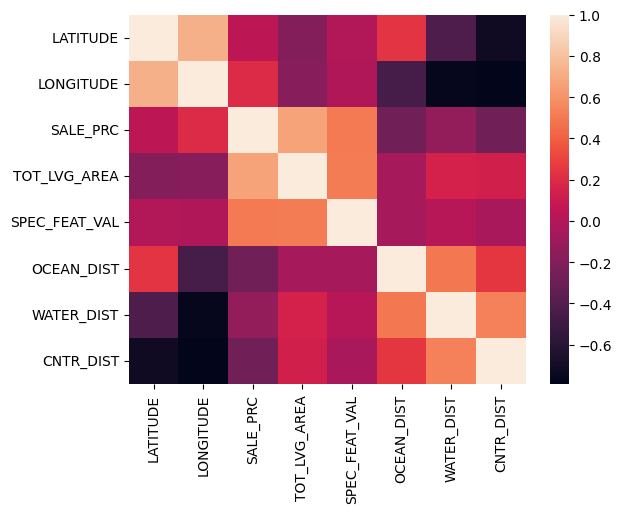

In [5]:
corr = df.select_dtypes("number").corr() # dropping the target
sns.heatmap(corr)

There are two notable section with high colleration

> The LND_SQFOOT, TOT_LVNG, SPEC_FEAT_VAL
will drop LND_SQFOOT as it has small corr to the target and will leave TOT_LVNG as it represent area and the SPEC_FEAT_VAL because it repressents the value of special features which influnces buyers decision making process

> The distance to the central business, water body and occean; in this will drop non





In [6]:
df['SALE_PRC'].min()

72000.0

Text(0.5, 1.0, 'SALE_PRC vs OCEAN_DIST')

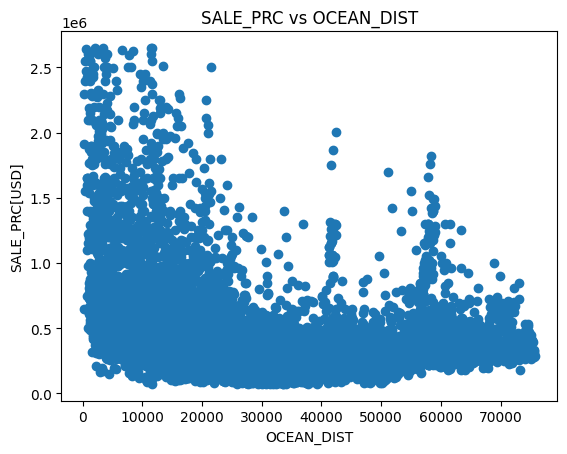

In [7]:
plt.scatter(x=df['OCEAN_DIST'],y= df['SALE_PRC'])
plt.xlabel("OCEAN_DIST")
plt.ylabel('SALE_PRC[USD]')
plt.title('SALE_PRC vs OCEAN_DIST')

It is seen that more houses are along the ocean hence it entails that that their is benefit associated with it to the real estate companies hence it has to be a factor to be used when predicting the price. This will be variefied by the exploration map using the latitude and lonitude.

In [8]:
fig = px.scatter_mapbox(
    df,
    lat='LATITUDE',
    lon='LONGITUDE',
    height = 900,
    width = 900,
    color = 'SALE_PRC',
    hover_data = ['SALE_PRC'],
    size ='SALE_PRC'
)

fig.update_layout(title="Miami Real Estate Price Map", mapbox_style='open-street-map')
fig.show()

From the map it show that distance to the ocean influence price as most yellow colored houses are along the ocean.This proves the assumption made from the scatter plot
From this we can generalize that distance to certain features such as ocean , central business center and water body impact final price of the house. I would recommend a thorough EDA to have best feature for your model



In [9]:
df.head()

,LATITUDE,LONGITUDE,SALE_PRC,TOT_LVG_AREA,SPEC_FEAT_VAL,OCEAN_DIST,WATER_DIST,CNTR_DIST
0,25.891031,-80.160561,440000.0,1753,0,12811.4,347.6,42815.3
1,25.891324,-80.153968,349000.0,1715,0,10648.4,337.8,43504.9
2,25.891334,-80.153740,800000.0,2276,49206,10574.1,297.1,43530.4
3,25.891765,-80.152657,988000.0,2058,10033,10156.5,0.0,43797.5
4,25.891825,-80.154639,755000.0,1684,16681,10836.8,326.6,43599.7


SPLITTING THE DATA AND PERFOMING ITERATIONS

In [10]:
# creating the features and target
x_feature =df[['LATITUDE',	'LONGITUDE',	'TOT_LVG_AREA','SPEC_FEAT_VAL',	'OCEAN_DIST',	'WATER_DIST','CNTR_DIST']]
y_target = df['SALE_PRC']

In [11]:
# spliting the dataset
X_train,X_test,Y_train,Y_test = train_test_split(x_feature,y_target, random_state=1, test_size=20)

In [12]:
# making a pipeline
model = make_pipeline(
    StandardScaler(),
    Ridge()
)

In [13]:
# iterating the model
model.fit(X_train,Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [14]:
check_is_fitted(model[-1]) # checking if the model is fitted

In [15]:
#defining a function that takes in in predictive variables
def make_prediction(lat, lon, area, spec_feat, ocean_d,water_d,cntr_d):
    data = {
            "LATITUDE": lat,
            "LONGITUDE" : lon,
            "TOT_LVG_AREA": area,
            "SPEC_FEAT_VAL":spec_feat,
            "OCEAN_DIST": ocean_d,
            "WATER_DIST":water_d,
            "CNTR_DIST": cntr_d
    }

    prediction = model.predict(pd.DataFrame(data, index=[0])).round()[0]
    return f"Predicted apartment price: ${prediction}"

**COMMUNICATING THE RESULTS TO THE CLIENTS**

In [16]:
# communicating the results
interact(
    make_prediction,
    lat=FloatSlider(
        min=X_train["LATITUDE"].min(),
        max=X_train["LATITUDE"].max(),
        step=0.01,
        value=X_train["LATITUDE"].mean(),
    ),
    lon=FloatSlider(
        min=X_train["LONGITUDE"].min(),
        max=X_train["LONGITUDE"].max(),
        step=0.01,
        value=X_train["LONGITUDE"].mean(),
    ),
    area = FloatSlider(
        min = X_train['TOT_LVG_AREA'].min(),
        max = X_train['TOT_LVG_AREA'].max(),
        step = .01,
        value = X_train['TOT_LVG_AREA'].mean()
    ),
    spec_feat = FloatSlider(
        min = X_train['SPEC_FEAT_VAL'].min(),
        max = X_train["SPEC_FEAT_VAL"].max(),
        step = .01,
        value = X_train['SPEC_FEAT_VAL'].mean()
    ),

    ocean_d =FloatSlider(
        min = X_train['OCEAN_DIST'].min(),
        max = X_train['OCEAN_DIST'].max(),
        step = 0.01,
        value= X_train['OCEAN_DIST'].mean()
    ),
    water_d = FloatSlider(
        min = X_train['WATER_DIST'].min(),
        max = X_train['WATER_DIST'].max(),
        step = 0.01,
        value = X_train['WATER_DIST'].mean()

    ),
    cntr_d = FloatSlider(
        min = X_train['CNTR_DIST'].min(),
        max = X_train['CNTR_DIST'].max(),
        step = 0.01,
        value = X_train['CNTR_DIST'].mean()
    ),
);

interactive(children=(FloatSlider(value=25.728826768369508, description='lat', max=25.9743818667, min=25.43433…

In [17]:
#Mean_Absolute_Error
y_pred_test = model.predict(X_test)
Model_mae = mean_absolute_error(Y_test,y_pred_test).round(int())
print(f'the model mean absolute error is: {Model_mae}')

the model mean absolute error is: 104210.0


In [18]:
MSE  = np.sqrt(mean_squared_error(Y_test,y_pred_test))
MSE

133563.637183261

In [19]:
# residual =[]
# for i in Y_test:
#   a=0
#   residual.append(y_pred_test[a]-i)
#   a =a +1
residual = Y_test - y_pred_test

Text(0.5, 1.0, 'Residual vs Y_pred_test to check model performance')

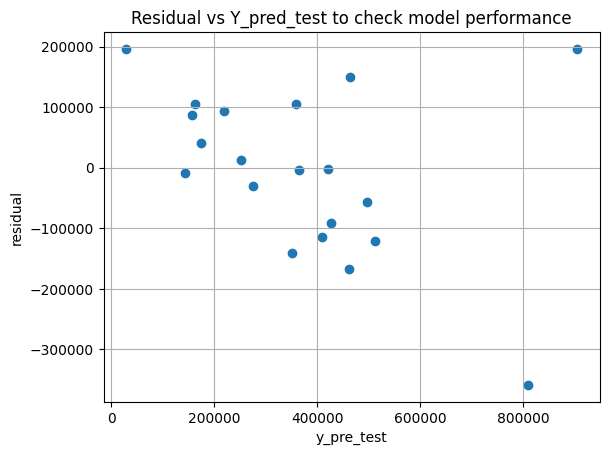

In [23]:
import matplotlib.pyplot as plt
plt.scatter(y_pred_test, residual)
plt.xlabel('y_pre_test')
plt.ylabel('residual')
plt.grid()
plt.title('Residual vs Y_pred_test to check model performance')

From the plot we can assume that our model performed well as the scatter plot doesnt suggest any pattern.

In [21]:
#saving the model
joblib.dump(model,'/content/drive/MyDrive/Data science journey/models/miami_real_estate.joblib') # replace with your path

['/content/drive/MyDrive/Data science journey/models/miami_real_estate.joblib']